In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 10

In [158]:
print("--- Step 2: Importing and Inspecting the Data ---")

--- Step 2: Importing and Inspecting the Data ---


In [159]:
try:
    df = pd.read_csv('Superstore.csv', encoding='latin1')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: Superstore.csv not found. Please ensure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred during file loading: {e}")
    exit()

Data loaded successfully.


In [160]:
selected_columns = ['Order Date', 'Ship Date', 'Segment', 'Region', 'Category',
                    'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit', 'Postal Code']

In [161]:
df_selected = df[selected_columns]

print(f"\nNumber of Rows (Records): {df_selected.shape[0]}")
print(f"Number of Columns (Features): {df_selected.shape[1]}")


Number of Rows (Records): 9994
Number of Columns (Features): 11


In [162]:
data_info = pd.DataFrame({
    'Dtype': df_selected.dtypes,
    'Non-Null Count': df_selected.count(),
    'Missing Values': df_selected.isnull().sum(),
    'Missing (%)': (df_selected.isnull().sum() / len(df_selected)) * 100
})
print("\nVariable Data Types and Missing Values:")
print(data_info)


Variable Data Types and Missing Values:
                Dtype  Non-Null Count  Missing Values  Missing (%)
Order Date     object            9994               0          0.0
Ship Date      object            9994               0          0.0
Segment        object            9994               0          0.0
Region         object            9994               0          0.0
Category       object            9994               0          0.0
Sub-Category   object            9994               0          0.0
Sales         float64            9994               0          0.0
Quantity        int64            9994               0          0.0
Discount      float64            9994               0          0.0
Profit        float64            9994               0          0.0
Postal Code     int64            9994               0          0.0


In [163]:
df_selected['Order Date'] = pd.to_datetime(df_selected['Order Date'])
df_selected['Ship Date'] = pd.to_datetime(df_selected['Ship Date'])

print("\nDescriptive Statistics (Numerical Columns):")
print(df_selected[['Sales', 'Quantity', 'Discount', 'Profit']].describe().T)


Descriptive Statistics (Numerical Columns):
           count        mean         std       min       25%      50%  \
Sales     9994.0  229.858001  623.245101     0.444  17.28000  54.4900   
Quantity  9994.0    3.789574    2.225110     1.000   2.00000   3.0000   
Discount  9994.0    0.156203    0.206452     0.000   0.00000   0.2000   
Profit    9994.0   28.656896  234.260108 -6599.978   1.72875   8.6665   

              75%        max  
Sales     209.940  22638.480  
Quantity    5.000     14.000  
Discount    0.200      0.800  
Profit     29.364   8399.976  


/tmp/ipython-input-1411133463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Order Date'] = pd.to_datetime(df_selected['Order Date'])
/tmp/ipython-input-1411133463.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Ship Date'] = pd.to_datetime(df_selected['Ship Date'])


In [164]:
print("\nPreview of the first 5 rows:")
print(df_selected.head())


Preview of the first 5 rows:
  Order Date  Ship Date    Segment Region         Category Sub-Category  \
0 2016-11-08 2016-11-11   Consumer  South        Furniture    Bookcases   
1 2016-11-08 2016-11-11   Consumer  South        Furniture       Chairs   
2 2016-06-12 2016-06-16  Corporate   West  Office Supplies       Labels   
3 2015-10-11 2015-10-18   Consumer  South        Furniture       Tables   
4 2015-10-11 2015-10-18   Consumer  South  Office Supplies      Storage   

      Sales  Quantity  Discount    Profit  Postal Code  
0  261.9600         2      0.00   41.9136        42420  
1  731.9400         3      0.00  219.5820        42420  
2   14.6200         2      0.00    6.8714        90036  
3  957.5775         5      0.45 -383.0310        33311  
4   22.3680         2      0.20    2.5164        33311  


In [165]:
print("\n--- Step 3: Handling Missing Data ---")


--- Step 3: Handling Missing Data ---


In [166]:
missing_postal_code_count = df_selected['Postal Code'].isnull().sum()
missing_postal_code_percent = data_info.loc['Postal Code', 'Missing (%)']
print(f"Missing 'Postal Code' values: {missing_postal_code_count} ({missing_postal_code_percent:.2f}%)")

Missing 'Postal Code' values: 0 (0.00%)


In [167]:
df_clean = df_selected.dropna(subset=['Postal Code']).copy()
print(f"Removed {df_selected.shape[0] - df_clean.shape[0]} rows with missing 'Postal Code'.")
print(f"New total rows: {df_clean.shape[0]}")

Removed 0 rows with missing 'Postal Code'.
New total rows: 9994


In [168]:
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum())


Missing values after cleaning:
Order Date      0
Ship Date       0
Segment         0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
Postal Code     0
dtype: int64


In [169]:
print("\n--- Step 4: Exploring Data Characteristics (Sales, Discount, Profit) ---")


--- Step 4: Exploring Data Characteristics (Sales, Discount, Profit) ---


In [170]:
numerical_cols = ['Sales', 'Discount', 'Profit']
stats_df = df_clean[numerical_cols].describe().loc[['mean', 'std', 'min', 'max']].T

In [171]:
for col in numerical_cols:
    stats_df.loc[col, 'median'] = df_clean[col].median()
    stats_df.loc[col, 'mode'] = df_clean[col].mode().iloc[0]
    stats_df.loc[col, 'range'] = df_clean[col].max() - df_clean[col].min()
    stats_df.loc[col, 'IQR'] = df_clean[col].quantile(0.75) - df_clean[col].quantile(0.25)
    stats_df.loc[col, 'skewness'] = df_clean[col].skew()
    stats_df.loc[col, 'kurtosis'] = df_clean[col].kurtosis()

print("\nDetailed Summary Statistics (Central Tendency, Spread, Skewness, Kurtosis):")
print(stats_df[['mean', 'median', 'mode', 'std', 'range', 'IQR', 'skewness', 'kurtosis']].to_markdown(floatfmt=".2f"))


Detailed Summary Statistics (Central Tendency, Spread, Skewness, Kurtosis):
|          |   mean |   median |   mode |    std |    range |    IQR |   skewness |   kurtosis |
|:---------|-------:|---------:|-------:|-------:|---------:|-------:|-----------:|-----------:|
| Sales    | 229.86 |    54.49 |  12.96 | 623.25 | 22638.04 | 192.66 |      12.97 |     305.31 |
| Discount |   0.16 |     0.20 |   0.00 |   0.21 |     0.80 |   0.20 |       1.68 |       2.41 |
| Profit   |  28.66 |     8.67 |   0.00 | 234.26 | 14999.95 |  27.64 |       7.56 |     397.19 |


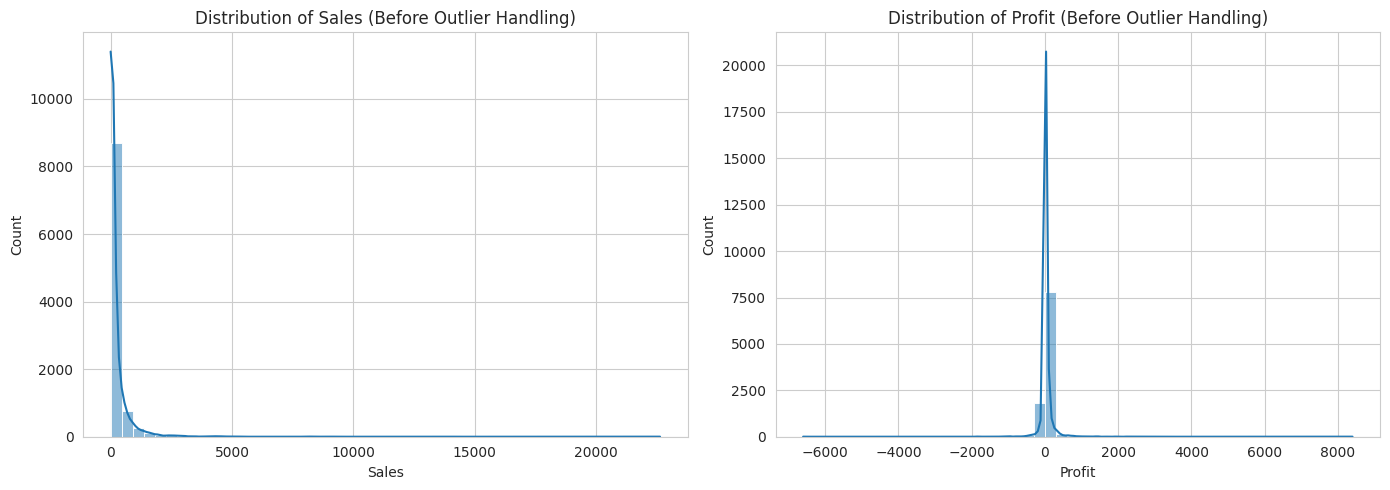

In [172]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_clean['Sales'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Sales (Before Outlier Handling)')
sns.histplot(df_clean['Profit'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Profit (Before Outlier Handling)')
plt.tight_layout()


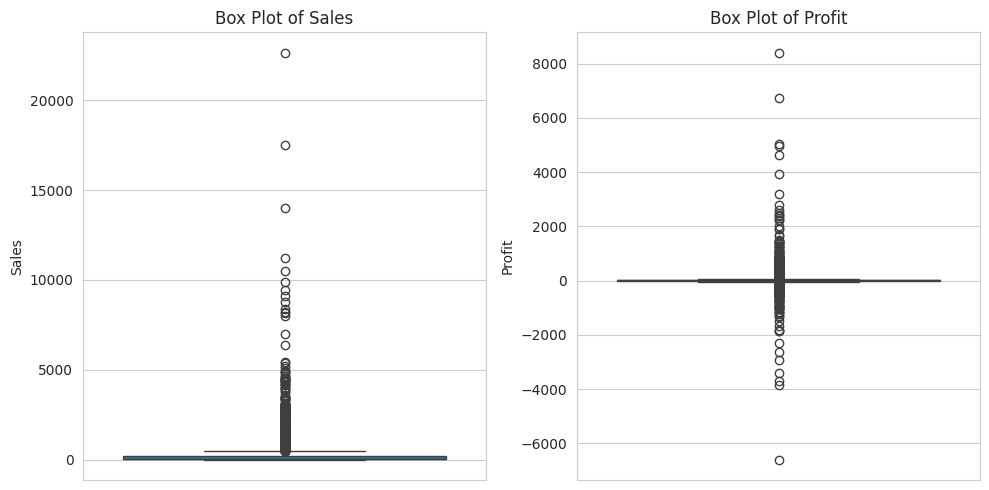

In [173]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.boxplot(y=df_clean['Sales'], ax=axes[0])
axes[0].set_title('Box Plot of Sales')
sns.boxplot(y=df_clean['Profit'], ax=axes[1])
axes[1].set_title('Box Plot of Profit')
plt.tight_layout()


In [174]:
def iqr_outlier_count(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

sales_outliers_iqr = iqr_outlier_count(df_clean['Sales'])
profit_outliers_iqr = iqr_outlier_count(df_clean['Profit'])
print(f"\nIQR Outlier Count for Sales: {sales_outliers_iqr}")
print(f"IQR Outlier Count for Profit: {profit_outliers_iqr}")


IQR Outlier Count for Sales: 1167
IQR Outlier Count for Profit: 1881


In [175]:
print("\n--- Step 5: Visualizing the Relationship of Data ---")


--- Step 5: Visualizing the Relationship of Data ---


In [176]:
category_counts = df_clean['Category'].value_counts()
print("\nFrequency Table for 'Category':")
print(category_counts)


Frequency Table for 'Category':
Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


Text(0.5, 1.0, 'Product Category Distribution')

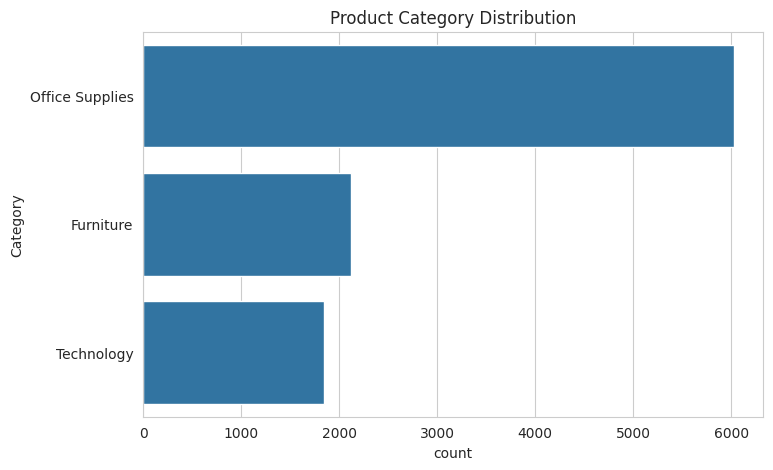

In [177]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Category', data=df_clean, order=df_clean['Category'].value_counts().index)
plt.title('Product Category Distribution')


(-1500.0, 1500.0)

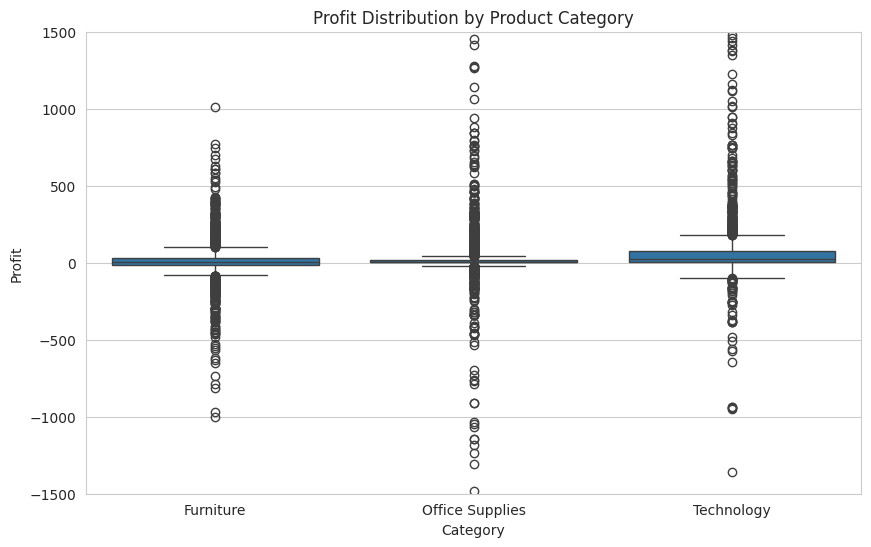

In [178]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit', data=df_clean)
plt.title('Profit Distribution by Product Category')
plt.ylim(-1500, 1500)


Text(0.5, 1.0, 'Sales vs. Profit colored by Discount')

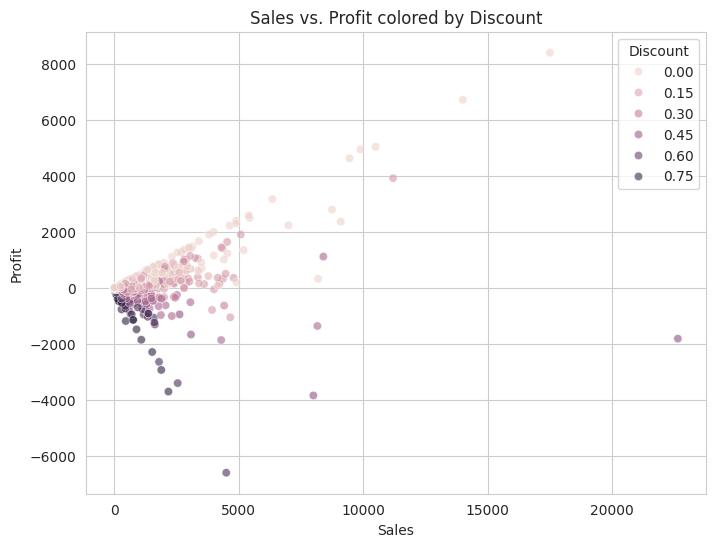

In [179]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Profit', hue='Discount', data=df_clean, alpha=0.6)
plt.title('Sales vs. Profit colored by Discount')

In [180]:
correlation_matrix = df_clean[numerical_cols].corr(method='pearson')
print("\nPearson Correlation Matrix (Sales, Discount, Profit):")
print(correlation_matrix.to_markdown(floatfmt=".3f"))


Pearson Correlation Matrix (Sales, Discount, Profit):
|          |   Sales |   Discount |   Profit |
|:---------|--------:|-----------:|---------:|
| Sales    |   1.000 |     -0.028 |    0.479 |
| Discount |  -0.028 |      1.000 |   -0.219 |
| Profit   |   0.479 |     -0.219 |    1.000 |


Text(0.5, 1.0, 'Correlation Heatmap')

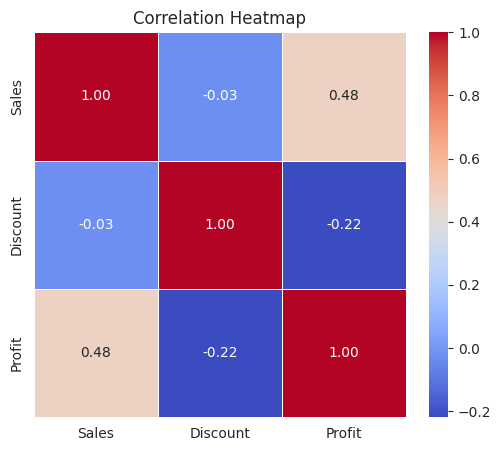

In [181]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')

In [182]:
print("\n--- Step 6: Handling Outliers (Sales and Profit) ---")


--- Step 6: Handling Outliers (Sales and Profit) ---


In [183]:
def winsorize_data(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = df[column].quantile(lower_percentile)
    upper_bound = df[column].quantile(upper_percentile)
    df[f'{column}_Winsorized'] = np.where(df[column] < lower_bound, lower_bound,
                                          np.where(df[column] > upper_bound, upper_bound, df[column]))
    return df

df_final = df_clean.copy()
df_final = winsorize_data(df_final, 'Sales', lower_percentile=0.05, upper_percentile=0.95)
df_final = winsorize_data(df_final, 'Profit', lower_percentile=0.05, upper_percentile=0.95)

In [184]:
print("\nPre- and Post-Winsorization Statistics Comparison:")
pre_stats = df_clean[['Sales', 'Profit']].agg(['mean', 'median', 'std']).T
post_stats = df_final[['Sales_Winsorized', 'Profit_Winsorized']].agg(['mean', 'median', 'std']).T
post_stats.columns = ['mean_W', 'median_W', 'std_W']
comparison = pd.concat([pre_stats, post_stats], axis=1)
print(comparison.to_markdown(floatfmt=".2f"))


Pre- and Post-Winsorization Statistics Comparison:
|                   |   mean |   median |    std |   mean_W |   median_W |   std_W |
|:------------------|-------:|---------:|-------:|---------:|-----------:|--------:|
| Sales             | 229.86 |    54.49 | 623.25 |   nan    |     nan    |  nan    |
| Profit            |  28.66 |     8.67 | 234.26 |   nan    |     nan    |  nan    |
| Sales_Winsorized  | nan    |   nan    | nan    |   175.62 |      54.49 |  257.65 |
| Profit_Winsorized | nan    |   nan    | nan    |    23.02 |       8.67 |   48.91 |


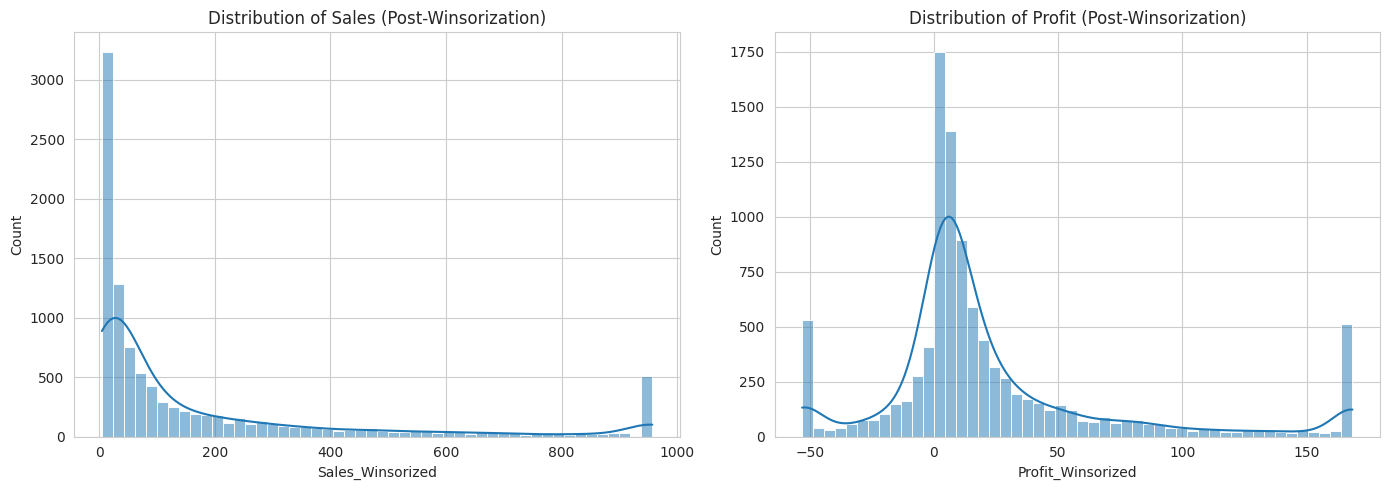

In [185]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.histplot(df_final['Sales_Winsorized'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Sales (Post-Winsorization)')
sns.histplot(df_final['Profit_Winsorized'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Profit (Post-Winsorization)')
plt.tight_layout()

In [186]:
print("\n--- EDA Script Execution Complete ---")


--- EDA Script Execution Complete ---
